In [1]:
# 경고메세지 제거
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_fname = 'c:/windows/fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams['font.family'] = font_family

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd
df = pd.read_csv('우선 지역 선정을 위한 KMeans 데이터셋.csv',encoding ='cp949',engine='python' )
df.head(1)

,법정동명,지하철역,문화여가시설,공공이용시설,지역화폐결제건수합,택시승강장수,동별세대,동별인구수,보증금_아파트,월세_아파트,보증금_연립다세대,월세_연립다세대,평균버스환승시간,최대버스환승시간
0,고등동,0,5,1,58712,1,9735.0,23268.0,10974.25474,10.108401,8764.064434,13.374063,10.907861,11.567838


## 1. 전체 열 기준

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5)
x = df.drop('법정동명', axis = 1)

In [7]:
model.fit(x)
result_df = x.copy()
result_df['label'] = model.labels_
result_df['label'].value_counts()

2    28
1    12
3     8
4     5
0     3
Name: label, dtype: int64

## 그룹별로 묶어서 특성 확인하기

In [8]:
result_df.groupby('label').mean()

,지하철역,문화여가시설,공공이용시설,지역화폐결제건수합,택시승강장수,동별세대,동별인구수,보증금_아파트,월세_아파트,보증금_연립다세대,월세_연립다세대,평균버스환승시간,최대버스환승시간
label,,,,,,,,,,,,,
0,0.666667,27.000000,7.00,927272.000000,9.666667,30682.666667,75123.000000,22792.067533,11.613714,9719.015081,9.761430,12.209745,27.740000
1,0.083333,6.500000,1.50,179168.583333,1.500000,6929.916667,15461.750000,15254.266888,10.920224,7216.527772,14.014899,11.808239,22.647636
2,0.071429,2.178571,0.50,35174.750000,0.678571,3707.517143,7984.665179,17185.529807,6.907996,7877.803731,14.768169,11.137082,16.515695
3,0.125000,11.500000,3.75,367756.000000,2.375000,17261.560000,41752.453125,21084.463317,13.575880,7640.803632,14.574590,13.064219,26.774385
4,0.400000,25.600000,4.60,591134.000000,5.600000,22480.000000,52447.600000,26072.828168,13.431904,21494.586026,10.199788,11.720593,22.778557


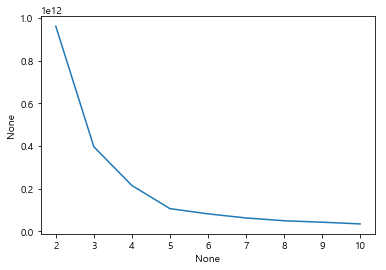

In [9]:
distance = []

for i in range(2,11):
    model = KMeans(n_clusters = i)
    model.fit(x)
    distance.append(model.inertia_)
sns.lineplot(x=list(range(2,11)), y=distance)


### =>K=5로 모델링 완료

## Train / Test 나누기

In [10]:
from sklearn.model_selection import train_test_split
X = result_df.drop('label', axis = 1)
y = result_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

## 모델

In [11]:
from sklearn.ensemble import RandomForestClassifier  # 분류임!
from sklearn.metrics import accuracy_score, confusion_matrix

C:\Users\AN\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
from sklearn.metrics import classification_report
# ▶ 학습
rfc = RandomForestClassifier(random_state = 123456, max_depth=6)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123456, verbose=0,
            warm_start=False)

In [13]:
# ▶ 예측
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8333333333333334

In [14]:
confusion_matrix(y_test, y_pred_test)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 8, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 0, 0, 1]], dtype=int64)

## 중요 변수 파악

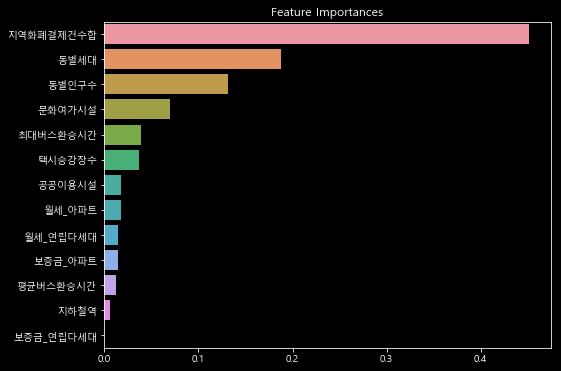

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_ 
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
# plt.rc('xtick', labelsize=5)
plt.show()

---
## 2. 지역화폐 제거 후

In [16]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5)
x_1 = df.drop(['법정동명','지역화폐결제건수합'], axis = 1)

In [17]:
model.fit(x_1)
result_df = x_1.copy()
result_df['label'] = model.labels_
result_df['label'].value_counts()

2    26
0    16
4     7
1     6
3     1
Name: label, dtype: int64

## 그룹별로 묶어서 특성 확인하기

In [18]:
result_df.groupby('label').mean()

,지하철역,문화여가시설,공공이용시설,택시승강장수,동별세대,동별인구수,보증금_아파트,월세_아파트,보증금_연립다세대,월세_연립다세대,평균버스환승시간,최대버스환승시간
label,,,,,,,,,,,,
0,0.125000,5.437500,1.437500,1.062500,9938.872500,21684.828125,18905.043960,10.402448,8201.761914,12.099963,12.301793,24.500042
1,0.333333,25.500000,5.666667,7.000000,27905.666667,70021.333333,24886.984972,11.036718,8705.289033,11.497280,12.493136,24.779542
2,0.076923,2.692308,0.576923,0.807692,1949.423077,4391.500000,15108.404012,7.241390,7357.752809,15.963303,10.849878,15.957227
3,0.000000,22.000000,7.000000,2.000000,22147.000000,53339.000000,45867.626530,24.527365,74929.166670,5.000000,11.047535,17.250000
4,0.285714,15.428571,3.857143,4.428571,18603.142857,42305.000000,20167.620457,12.801616,7891.796806,13.705501,12.621609,24.671874


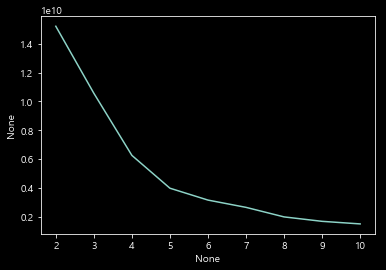

In [19]:
distance = []

for i in range(2,11):
    model = KMeans(n_clusters = i)
    model.fit(x_1)
    distance.append(model.inertia_)
sns.lineplot(x=list(range(2,11)), y=distance)

## Train / Test 나누기

In [20]:
from sklearn.model_selection import train_test_split
X = result_df.drop('label', axis = 1)
y = result_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

## 모델

In [21]:
from sklearn.ensemble import RandomForestClassifier  # 분류임!
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
from sklearn.metrics import classification_report
# ▶ 학습
rfc = RandomForestClassifier(random_state = 123456, max_depth=6)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123456, verbose=0,
            warm_start=False)

In [23]:
# ▶ 예측
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)
accuracy_score(y_test, y_pred_test)

1.0

In [24]:
confusion_matrix(y_test, y_pred_test)

array([[4, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 1]], dtype=int64)

## 중요 변수 파악

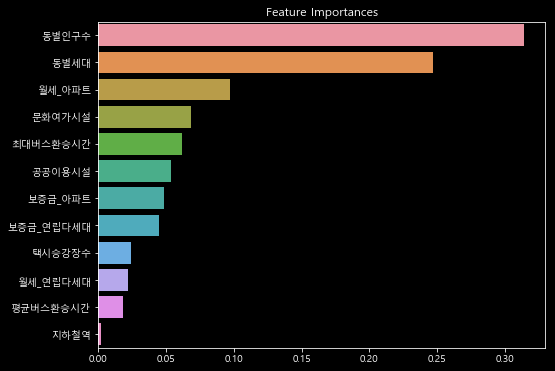

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_ 
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
# plt.rc('xtick', labelsize=5)
plt.show()